<a href="https://colab.research.google.com/github/Dhyeonle9/machine-learning/blob/master/240121%EB%8F%84%ED%98%84%ED%81%B4%EB%A1%A0%EC%BD%94%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 클론코딩
## 💸Bank Churn | 💵 kFold | LGBM+Cat+XGB Ensemble 🚀
#### https://www.kaggle.com/code/iqmansingh/bank-churn-kfold-lgbm-cat-xgb-ensemble
#### Public Score 0.89207

In [ ]:
# Google Drive와 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Dataset

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

train_data = pd.read_csv('/content/drive/MyDrive/얼레벌레/Kaggle/Binary Classification with a Bank Churn Dataset/Dataset/train.csv', index_col='id')
test_data = pd.read_csv("/content/drive/MyDrive/얼레벌레/Kaggle/Binary Classification with a Bank Churn Dataset/Dataset/test.csv",index_col="id")

### train data에 아래 데이터셋 추가
https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction

In [ ]:
orig_data = pd.read_csv("/content/drive/MyDrive/작업/kaggle/Binary Classification with a Bank Churn Dataset/Churn_Modelling.csv",index_col = "RowNumber")
orig_data.dropna(inplace=True)

In [ ]:
train_data = pd.concat([train_data,orig_data])
train_data.reset_index(drop=True,inplace=True)

In [ ]:
train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
train_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.750320e+05,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000
mean,1.569194e+07,656.115945,38.171265,5.019933,56677.821792,1.553070,0.751188,0.498743,111862.236392,0.211156
std,7.142820e+04,81.149591,8.969537,2.811133,62982.219148,0.549211,0.432326,0.500000,50815.188500,0.408130
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563288e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,73214.330000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116969.730000,0.000000
75%,1.575666e+07,710.000000,42.000000,7.000000,120727.970000,2.000000,1.000000,1.000000,154767.340000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:

test_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [ ]:
test_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


# Data Processing

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_enc = LabelEncoder()

train_data['Gender'] = label_enc.fit_transform(train_data[['Gender']])
test_data['Gender'] = label_enc.transform(test_data[['Gender']])

train_data['Geography'] = label_enc.fit_transform(train_data[['Geography']])
test_data['Geography'] = label_enc.transform(test_data[['Geography']])

train_data["Surname"] = label_enc.fit_transform(train_data[["Surname"]])
test_data["Surname"] = label_enc.transform(test_data[["Surname"]])

train_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,2023,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,2024,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,1236,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,1362,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,491,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
test_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,1607,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,1966,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,1351,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,1986,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,1172,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00


In [ ]:
from sklearn.cluster import KMeans

N_CLUSTERS = 7
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto")

clusters_train = kmeans.fit_predict(train_data.drop(["Exited"],axis=1))
clusters_test = kmeans.predict(test_data)

train_data["cluster"] = clusters_train
test_data["cluster"] = clusters_test

# Exploratory Data Analysis & Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

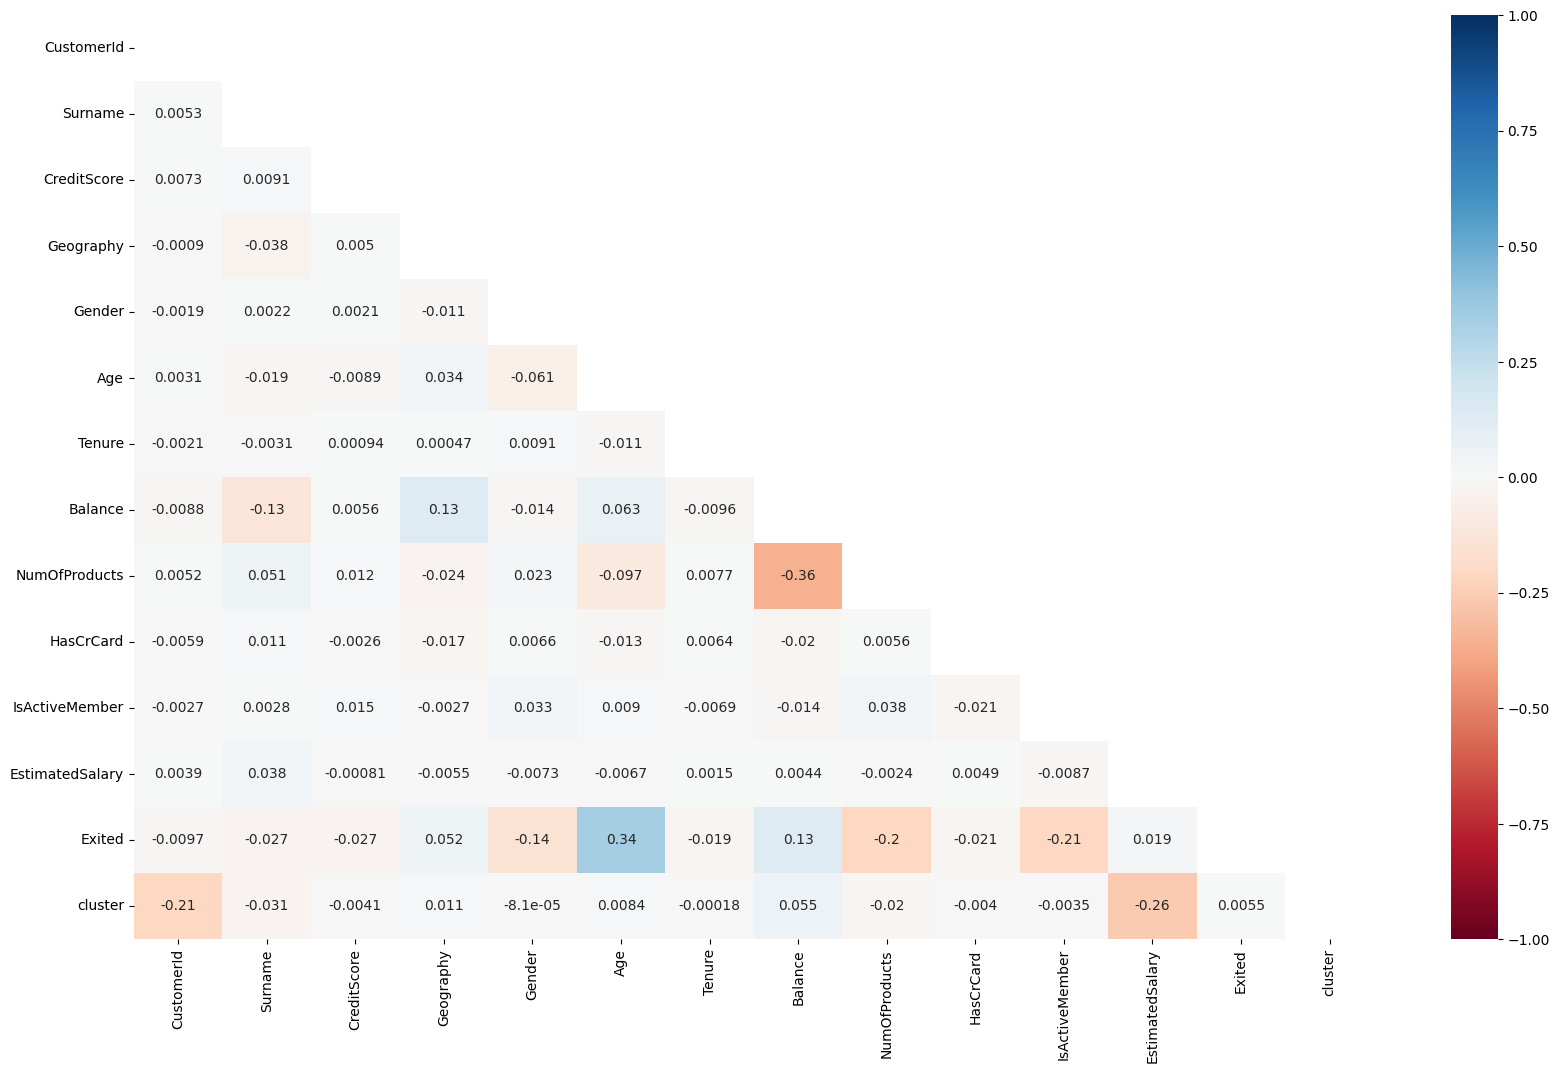

In [ ]:
mask = np.triu(np.ones_like(train_data.corr()))
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(), annot=True, cmap='RdBu', mask=mask, vmin=-1, vmax=1)

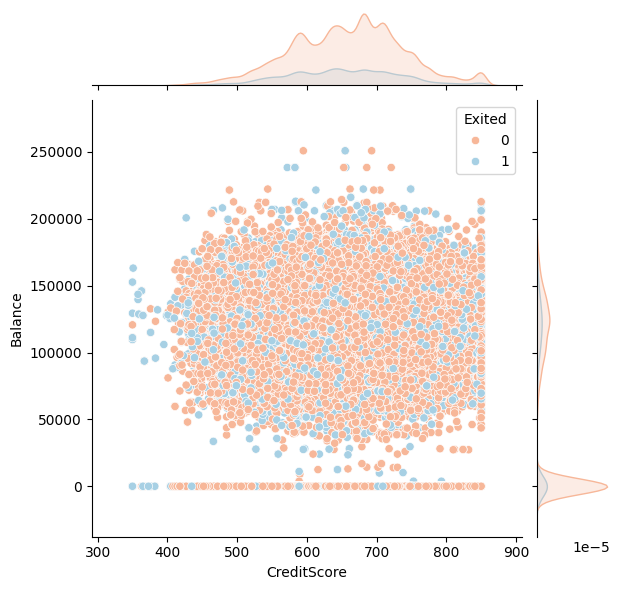

In [ ]:
sns.jointplot(data=train_data, x="CreditScore", y="Balance", hue = "Exited", palette = "RdBu");

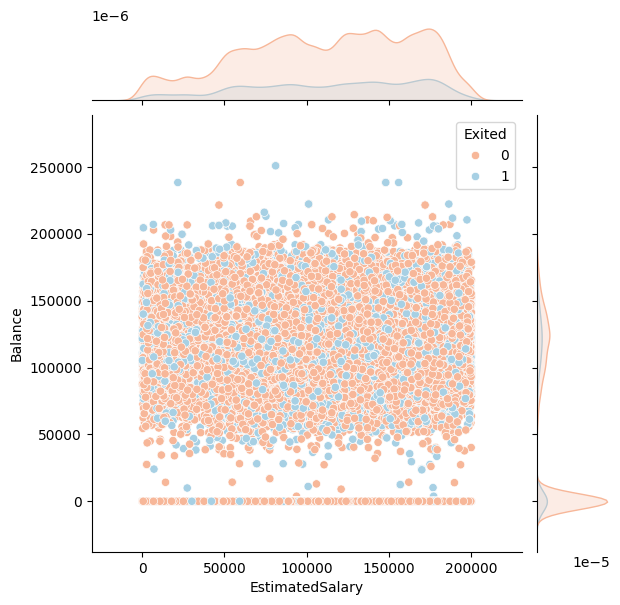

In [ ]:
sns.jointplot(data=train_data, x="EstimatedSalary", y="Balance", hue = "Exited", palette = "RdBu");

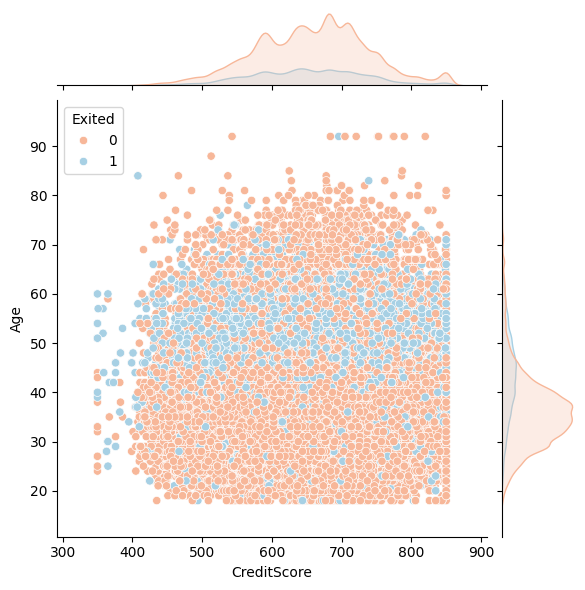

In [ ]:
sns.jointplot(data=train_data, x="CreditScore", y="Age", hue = "Exited", palette = "RdBu");

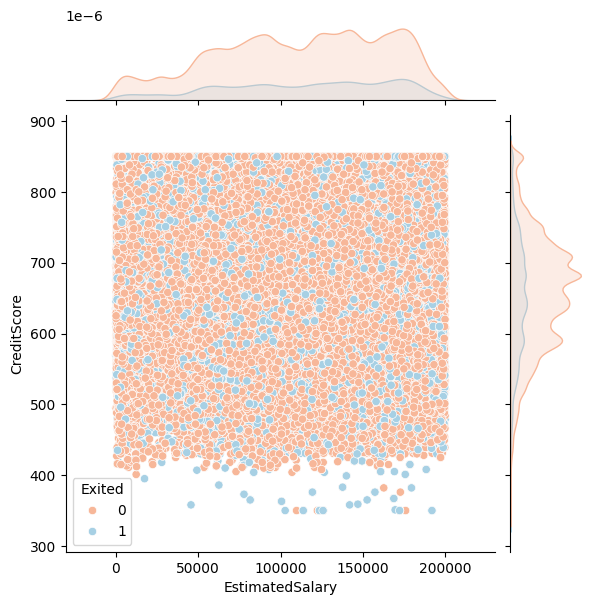

In [ ]:
sns.jointplot(data=train_data, x="EstimatedSalary", y="CreditScore", hue = "Exited", palette = "RdBu");

<ipython-input-19-56b51f570981>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data,x="Exited", palette = "RdBu");


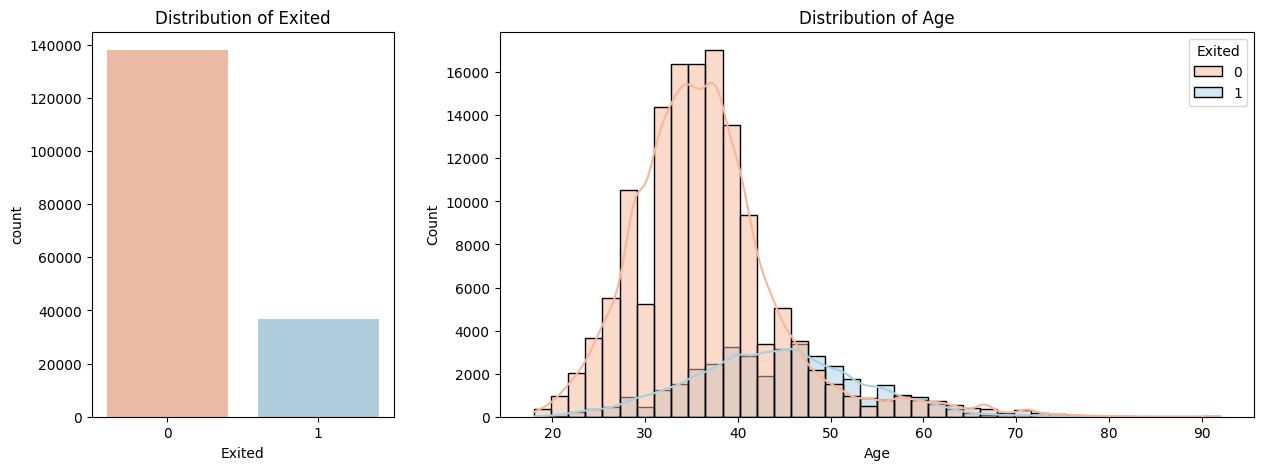

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(15,5),gridspec_kw={'width_ratios': [1, 2.5]})

plt.subplot(1,2,1)
sns.countplot(data=train_data,x="Exited", palette = "RdBu");
plt.title("Distribution of Exited")

plt.subplot(1,2,2)
sns.histplot(data=train_data,x="Age",hue="Exited", bins=40, kde=True, palette = "RdBu");
plt.title("Distribution of Age")

fig.show();

In [ ]:
from collections import Counter

In [ ]:
clusts = list(dict(sorted(Counter(clusters_test).items(), key=lambda item:item[0])).values())

In [ ]:
clusts

[12586, 18918, 11185, 25444, 11045, 16008, 14837]

In [ ]:
Counter(clusters_test).items()

dict_items([(3, 25444), (6, 14837), (5, 16008), (1, 18918), (2, 11185), (4, 11045), (0, 12586)])

In [ ]:
sorted(Counter(clusters_test).items(), key=lambda item:item[0])

[(0, 12586),
 (1, 18918),
 (2, 11185),
 (3, 25444),
 (4, 11045),
 (5, 16008),
 (6, 14837)]

In [ ]:
dict(sorted(Counter(clusters_test).items(), key=lambda item:item[0]))

{0: 12586, 1: 18918, 2: 11185, 3: 25444, 4: 11045, 5: 16008, 6: 14837}

In [ ]:
clusts.extend(list(dict(sorted(Counter(clusters_train).items(), key=lambda item: item[0])).values()))

In [ ]:
clusters = pd.DataFrame()
clusters["clusters_type"] = ["test"]*N_CLUSTERS + ["train"]*N_CLUSTERS
clusters["Cluster Label"] = list(range(0,N_CLUSTERS))*2
clusters["No of Items"] = clusts

In [ ]:
clusters.head(20)

,clusters_type,Cluster Label,No of Items
0,test,0,12586
1,test,1,18918
2,test,2,11185
3,test,3,25444
4,test,4,11045
5,test,5,16008
6,test,6,14837
7,train,0,20421
8,train,1,29619
9,train,2,18415


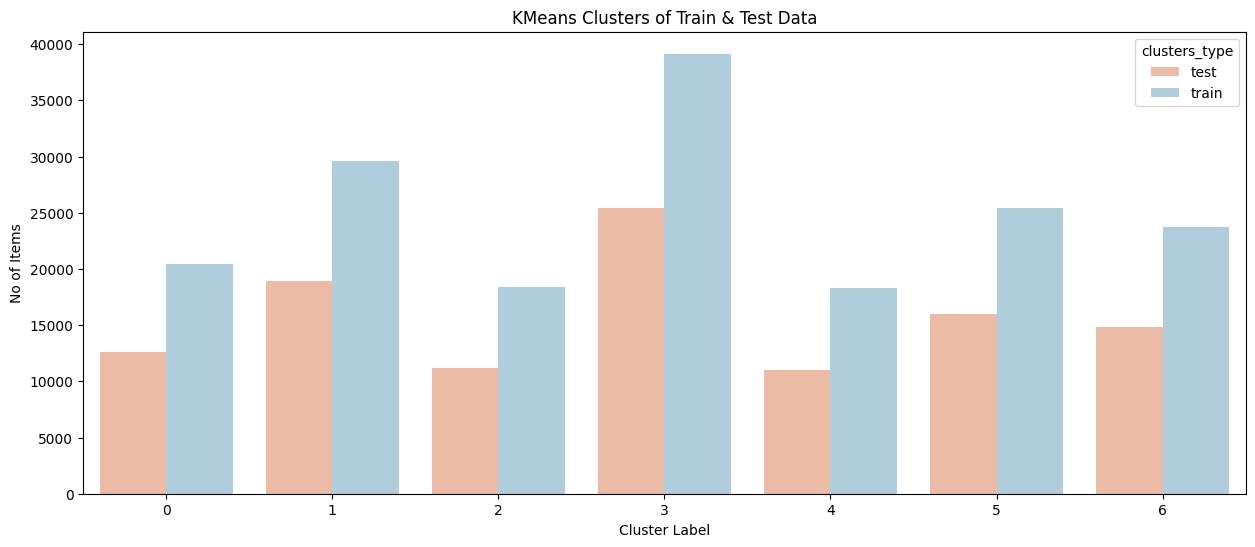

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(clusters,x="Cluster Label",y="No of Items",hue="clusters_type",palette = "RdBu")
plt.title("KMeans Clusters of Train & Test Data");

In [ ]:
clusters["No of Exited"] = 0
clusters["No of Exited"][clusters["clusters_type"]=="train"] = list(dict(sorted(Counter(train_data[train_data["Exited"]==1].cluster).items(), key=lambda item: item[0])).values())
clusters["Ratio of Exited"] = clusters["No of Exited"]/clusters["No of Items"]

<ipython-input-30-23d743f55562>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters["No of Exited"][clusters["clusters_type"]=="train"] = list(dict(sorted(Counter(train_data[train_data["Exited"]==1].cluster).items(), key=lambda item: item[0])).values())


In [ ]:
clusters["No of Exited"][clusters["clusters_type"]=="test"] = list(dict(sorted(Counter(train_data[train_data["Exited"]==1].cluster).items(), key=lambda item: item[0])).values())
clusters["Ratio of Exited"] = clusters["No of Exited"]/clusters["No of Items"]

<ipython-input-31-9cdf75f16a53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters["No of Exited"][clusters["clusters_type"]=="test"] = list(dict(sorted(Counter(train_data[train_data["Exited"]==1].cluster).items(), key=lambda item: item[0])).values())


In [ ]:
clusters.head(20)

,clusters_type,Cluster Label,No of Items,No of Exited,Ratio of Exited
0,test,0,12586,5525,0.438980
1,test,1,18918,5043,0.266572
2,test,2,11185,4866,0.435047
3,test,3,25444,6261,0.246070
4,test,4,11045,4635,0.419647
5,test,5,16008,3942,0.246252
6,test,6,14837,6687,0.450698
7,train,0,20421,5525,0.270555
8,train,1,29619,5043,0.170262
9,train,2,18415,4866,0.264241


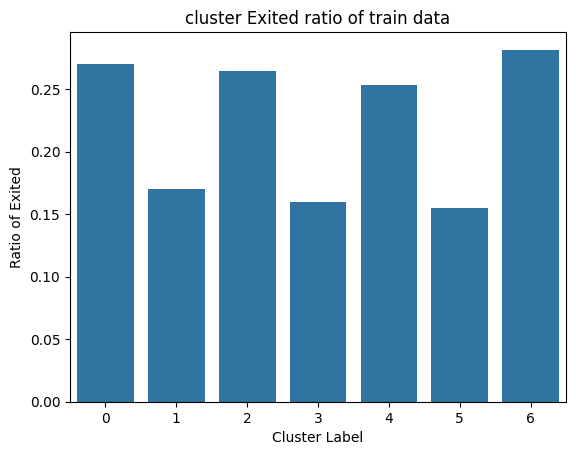

In [ ]:
sns.barplot(data = clusters.query("clusters_type == 'train'"),y="Ratio of Exited", x ="Cluster Label");
plt.title("cluster Exited ratio of train data");

<Axes: xlabel='Cluster Label', ylabel='Ratio of Exited'>

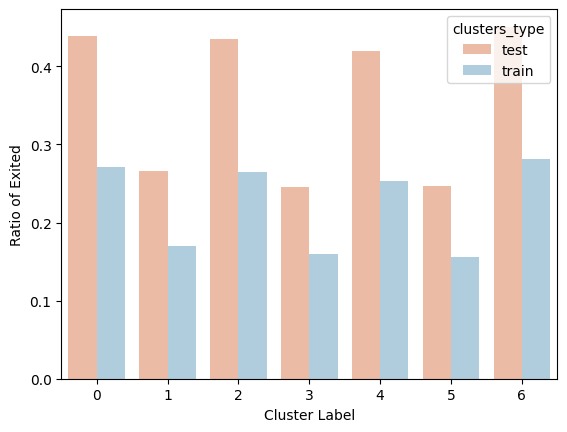

In [ ]:
sns.barplot(clusters,x="Cluster Label",y="Ratio of Exited",hue="clusters_type",palette = "RdBu")

# Training Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
seed = np.random.seed(6)

X = train_data.drop("Exited",axis=1)
y = train_data.Exited

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3)
print(len(X_train),len(X_val))

122522 52510


## Baseline Models

In [ ]:
!pip install xgboost

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.9 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm==3.3.2

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

In [ ]:
lgbmmodel = LGBMClassifier(random_state=seed, verbose=-1)
lgbmmodel.fit(X_train,y_train)
print("\n","-"*25,"Baseline LGBM","-"*25)
print("CV score of LGBM is ",cross_val_score(lgbmmodel,X,y,cv=4, scoring = 'roc_auc').mean())
print("ROC AUC over Val Data:",roc_auc_score(lgbmmodel.predict(X_val),y_val))


 ------------------------- Baseline LGBM -------------------------
CV score of LGBM is  0.9160730384065824
ROC AUC over Val Data: 0.840658521997647


In [ ]:
xgbmodel = XGBClassifier(random_state=seed)
xgbmodel.fit(X_train,y_train)
print("\n","-"*25,"Baseline XGB","-"*25)
print("CV score of XGB is ",cross_val_score(xgbmodel,X,y,cv=4, scoring = 'roc_auc').mean())
print("ROC AUC over Val Data:",roc_auc_score(xgbmodel.predict(X_val),y_val))


 ------------------------- Baseline XGB -------------------------
CV score of XGB is  0.9148899124822805
ROC AUC over Val Data: 0.8585600520926975


## Creating More Training Data from Test

In [ ]:
public_work1 = pd.read_csv("/content/drive/MyDrive/작업/kaggle/Binary Classification with a Bank Churn Dataset/input/pgs41-just-few-lines-of-autogluon/simple_ag.csv")
public_work2 = pd.read_csv("/content/drive/MyDrive/작업/kaggle/Binary Classification with a Bank Churn Dataset/input/ps4e1-advanced-feature-engineering-ensemble/submission.csv")

In [ ]:
for i in range(3):
    print(f"> Generating More Data")
    print(f"  Inital Train Size:{len(train_data)} --> ",end="")

    X = train_data.drop("Exited",axis=1)
    y = train_data.Exited

    lgbmmodel.fit(X,y)
    xgbmodel.fit(X,y)

    more_train = test_data.copy()
    more_train["Exited"] = (lgbmmodel.predict_proba(test_data)[:,1]+xgbmodel.predict_proba(test_data)[:,1])/2
    more_train["Exited"] = (2*more_train["Exited"].to_numpy()+public_work1["Exited"].to_numpy()+public_work2["Exited"].to_numpy())/4
    more_train = more_train.query("Exited>0.95 | Exited<0.05")
    more_train["Exited"] = round(more_train["Exited"])
    more_train["Exited"] = more_train["Exited"].astype("int64")

    train_data = pd.concat([train_data,more_train])
    train_data.drop_duplicates(inplace=True)
    train_data.reset_index(inplace=True,drop=True)
    train_data = train_data.sample(frac=1)

    print(f" Final Train Size:{len(train_data)}\n")

> Generating More Data
  Inital Train Size:221471 --> 

<ipython-input-75-96151aa7f70b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_train["Exited"] = round(more_train["Exited"])
<ipython-input-75-96151aa7f70b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_train["Exited"] = more_train["Exited"].astype("int64")


 Final Train Size:221830

> Generating More Data
  Inital Train Size:221830 --> 

<ipython-input-75-96151aa7f70b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_train["Exited"] = round(more_train["Exited"])
<ipython-input-75-96151aa7f70b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_train["Exited"] = more_train["Exited"].astype("int64")


 Final Train Size:222043

> Generating More Data
  Inital Train Size:222043 -->  Final Train Size:222227



In [ ]:
X = train_data.drop("Exited",axis=1)
y = train_data.Exited

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3)
print(len(X_train),len(X_val))

155558 66669


In [ ]:
lgbmmodel = LGBMClassifier(random_state=seed,verbose=-1)
lgbmmodel.fit(X_train,y_train)
print("\n","-"*25,"New Baseline Scores for LGBM","-"*25)
print("CV score of LGBM is ",cross_val_score(lgbmmodel,X,y,cv=4, scoring = 'roc_auc').mean())
print("ROC AUC over Val Data:",roc_auc_score(lgbmmodel.predict(X_val),y_val))


 ------------------------- New Baseline Scores for LGBM -------------------------
CV score of LGBM is  0.9162933436540713
ROC AUC over Val Data: 0.8371623039882579


In [ ]:
xgbmodel = XGBClassifier(random_state=seed)
xgbmodel.fit(X_train,y_train)
print("\n","-"*25,"New Baseline Scores for XGB","-"*25)
print("CV score of XGB is ",cross_val_score(xgbmodel,X,y,cv=4, scoring = 'roc_auc').mean())
print("ROC AUC over Val Data:",roc_auc_score(xgbmodel.predict(X_val),y_val))


 ------------------------- New Baseline Scores for XGB -------------------------
CV score of XGB is  0.9150371158444812
ROC AUC over Val Data: 0.8338611362587945


## Optuna-Tuned LGBM Classifier

In [ ]:
lgbm_params = {'max_depth': 41, 'learning_rate': 0.03432850637422446,
               'min_child_weight': 2.9603503357916763, 'min_child_samples': 30,
               'subsample': 0.8782988886358021, 'subsample_freq': 3,
               'colsample_bytree': 0.501275718332705, 'num_leaves': 25}

In [ ]:
lgbmmodel = LGBMClassifier(**lgbm_params,n_estimators = 1464,random_state=seed,verbose=-1)
lgbmmodel.fit(X_train,y_train)
print("CV score of LGBM is ",cross_val_score(lgbmmodel,X,y,cv=4, scoring = 'roc_auc').mean())
print("ROC AUC over Val Data:",roc_auc_score(lgbmmodel.predict(X_val),y_val))

CV score of LGBM is  0.9179453684332818
ROC AUC over Val Data: 0.8392836321842208


## Optuna-Tuned XGB Classifier

In [ ]:
xgb_params = {'max_depth': 6, 'min_child_weight': 2.7526603493948096,
              'learning_rate': 0.015273686530995825, 'subsample': 0.7109136660293711,
              'gamma': 0.2939927860245192, 'colsample_bytree': 0.5015735880252528,
              'colsample_bylevel': 0.6877145513802184, 'colsample_bynode': 0.9449955113410351}

In [ ]:
xgbmodel = XGBClassifier(**xgb_params,n_estimators=1670, random_state=seed)
xgbmodel.fit(X_train,y_train)
print("CV score of XGB is ",cross_val_score(xgbmodel,X,y,cv=4, scoring = 'roc_auc').mean())
print("ROC AUC over Val Data:",roc_auc_score(xgbmodel.predict(X_val),y_val))

CV score of XGB is  0.9174104924070833
ROC AUC over Val Data: 0.8416363063994313


#Out-of-Fold Predictions LGBM + CatBoost + XGB

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
submission = pd.DataFrame()
submission["id"] = test_data.index
submission["Exited"] = 0

In [ ]:
SPLITS = 4
REPEATS = 2
lgbm_auc_score = []
cat_auc_score = []
xgb_auc_score = []
denom = 0

In [ ]:
!pip install tabgan==1.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
for i,(tr,val) in enumerate(RepeatedStratifiedKFold(n_splits=SPLITS, n_repeats=REPEATS,random_state=seed).split(X,y)):

    print("-"*30,f"FOLD {i+1}/{SPLITS*REPEATS}","-"*30)
    X_train, X_test, y_train, y_test = X.iloc[tr,:],X.iloc[val,:],y.iloc[tr],y.iloc[val]

    print("\n->","LGBM:")
    lgbmmodel = LGBMClassifier(**lgbm_params,n_estimators= 7500,random_state=seed)
    lgbmmodel.fit(X_train,y_train, eval_set=[(X_test,y_test)], eval_names=["valid"],eval_metric=['auc'])
    auc = roc_auc_score(y_test, lgbmmodel.predict_proba(X_test)[:,1])
    lgbm_auc_score.append(auc)
    print(f"\nFold {i+1} ROC_AUC of LGBM =", auc,"\n")
    submission["Exited"] += lgbmmodel.predict_proba(test_data)[:,1]
    denom+=1

    print("\n->","CAT:")
    train_dataset = Pool(data=X.iloc[tr,:],label=y.iloc[tr])
    eval_dataset = Pool(data=X.iloc[val,:],label=y.iloc[val])

    catmodel = CatBoostClassifier(iterations=7500,verbose=1000, od_type="Iter",eval_metric="AUC", random_seed=seed,early_stopping_rounds=2000)
    catmodel.fit(train_dataset, use_best_model=True, eval_set=eval_dataset)
    auc = roc_auc_score(y.iloc[val], catmodel.predict_proba(X.iloc[val,:])[:,1])
    cat_auc_score.append(auc)
    submission["Exited"] += catmodel.predict_proba(test_data)[:,1]
    denom+=1

    print("\n->","XGB:")
    xgbmodel = XGBClassifier(**xgb_params,n_estimators= 7500,random_state=seed,eval_metric="auc",early_stopping_rounds = 2000)
    xgbmodel.fit(X_train,y_train, eval_set=[(X_test,y_test)],verbose = 1000)
    auc = roc_auc_score(y_test, xgbmodel.predict_proba(X_test)[:,1])
    xgb_auc_score.append(auc)
    print(f"\nFold {i+1} ROC_AUC of XGB =", auc)
    submission["Exited"] += xgbmodel.predict_proba(test_data)[:,1]
    denom+=1

print("\n\n","-"*50,sep="")
print("CV score of LGBM is ",np.array(lgbm_auc_score).mean())
print("CV score of CAT is ",np.array(cat_auc_score).mean())
print("CV score of XGB is ",np.array(xgb_auc_score).mean())

------------------------------ FOLD 1/8 ------------------------------

-> LGBM:
[LightGBM] [Info] Number of positive: 28715, number of negative: 137955
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1374
[LightGBM] [Info] Number of data points in the train set: 166670, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.172287 -> initscore=-1.569508
[LightGBM] [Info] Start training from score -1.569508

Fold 1 ROC_AUC of LGBM = 0.9112259209342752 


-> CAT:
Learning rate set to 0.046672
0:	test: 0.8887672	best: 0.8887672 (0)	total: 12.5ms	remaining: 1m 33s
1000:	test: 0.9144930	best: 0.9144962 (999)	total: 13.2s	remaining: 1m 25s
2000:	test: 0.9143646	best: 0.9146663 (1534)	total: 25.9s	remaining: 1m 11s
3000:	test: 0.9137320	best: 0.9146663 (1534)	total:

# Creating submission.csv

In [ ]:
submission["Exited"] = submission["Exited"]/denom

In [ ]:
submission["Exited"] = 0.6*submission["Exited"]+0.2*public_work1["Exited"]+0.2*public_work2["Exited"]

submission.to_csv("/content/drive/MyDrive/작업/kaggle/Binary Classification with a Bank Churn Dataset/submission.csv",header=True,index=False)
submission

,id,Exited
0,165034,0.015032
1,165035,0.809892
2,165036,0.016425
3,165037,0.197052
4,165038,0.366959
...,...,...
110018,275052,0.027693
110019,275053,0.197765
110020,275054,0.011294
110021,275055,0.165307


# Score: 0.89303

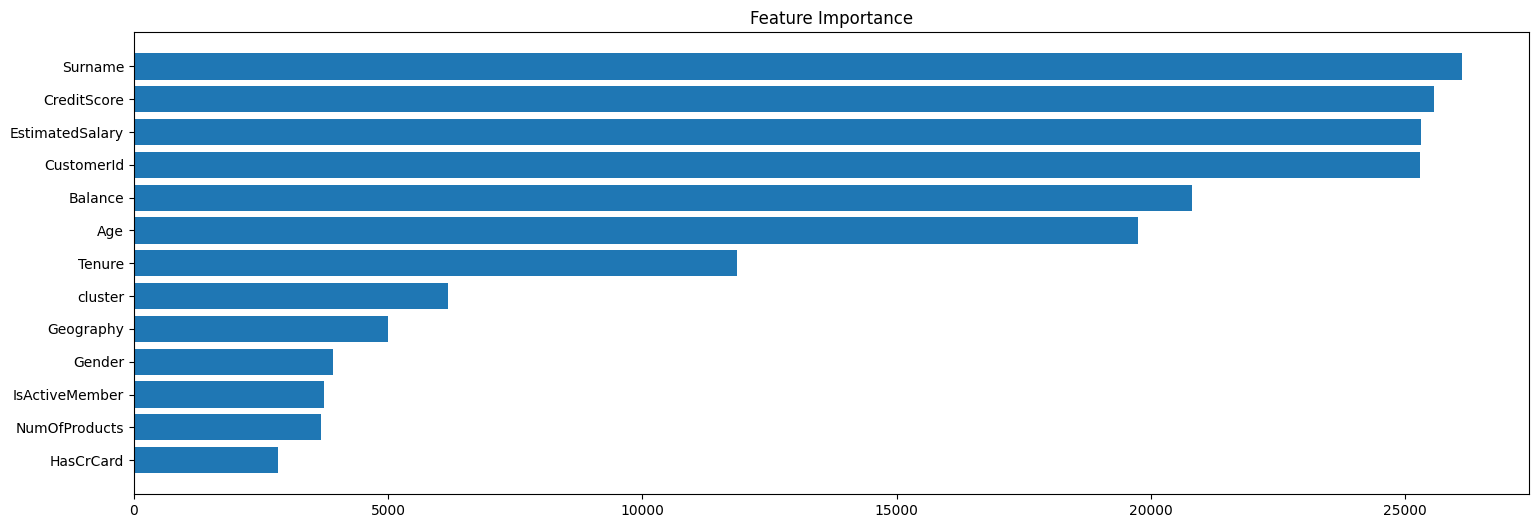

In [ ]:
# feature importance
feature_importance = lgbmmodel.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

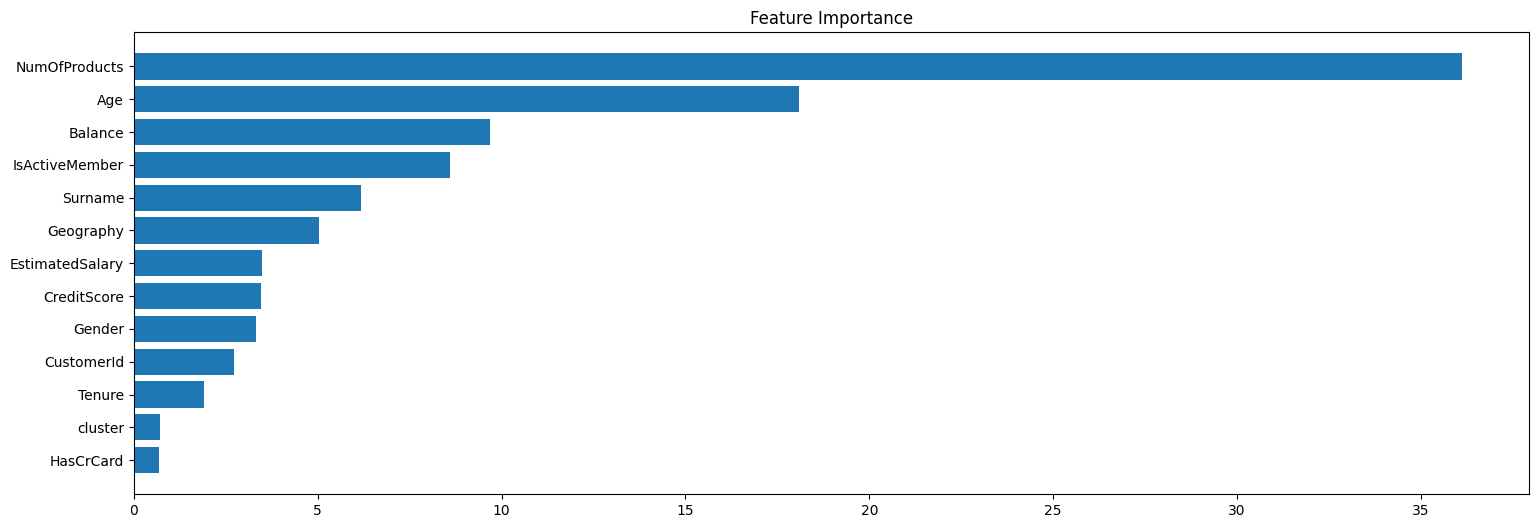

In [ ]:
# feature importance
feature_importance = catmodel.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

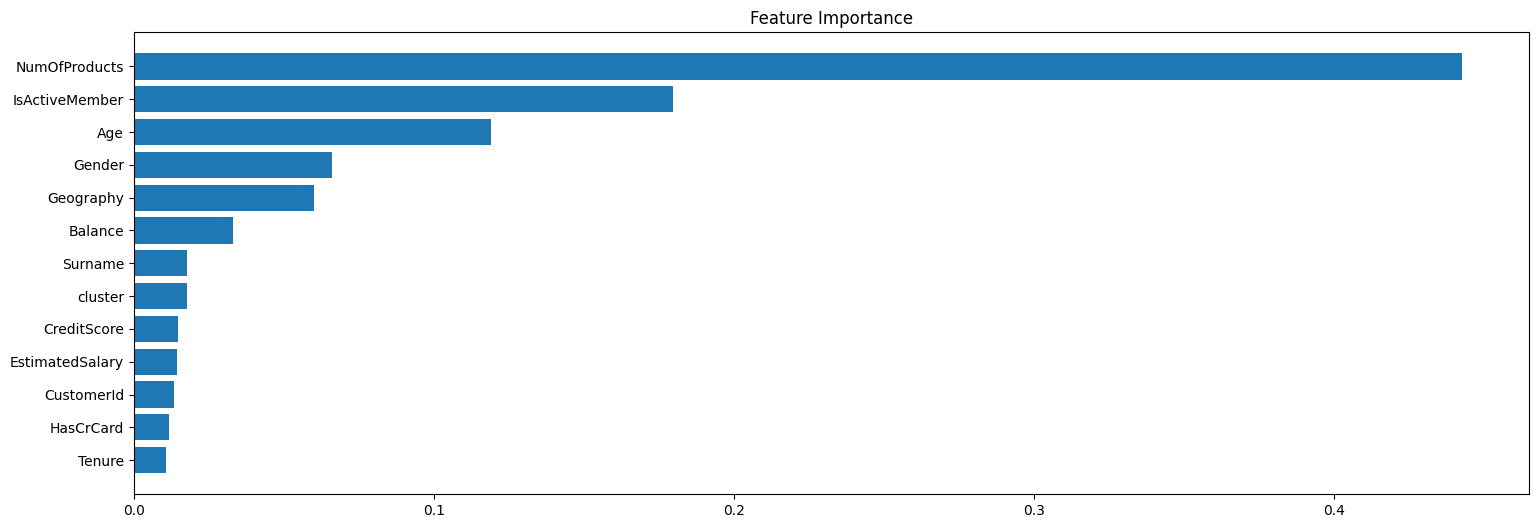

In [ ]:
# feature importance
feature_importance = xgbmodel.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

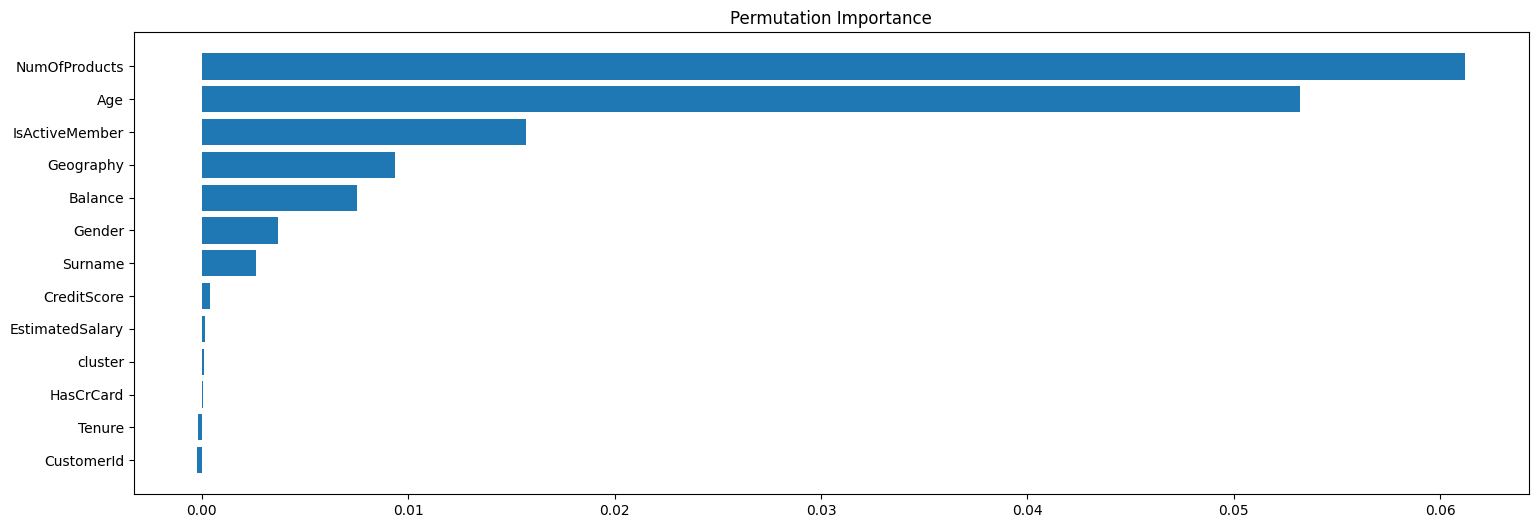

In [ ]:
# permutation importance
perm_importance = permutation_importance(lgbmmodel, np.ascontiguousarray(X_test), y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')
plt.show()

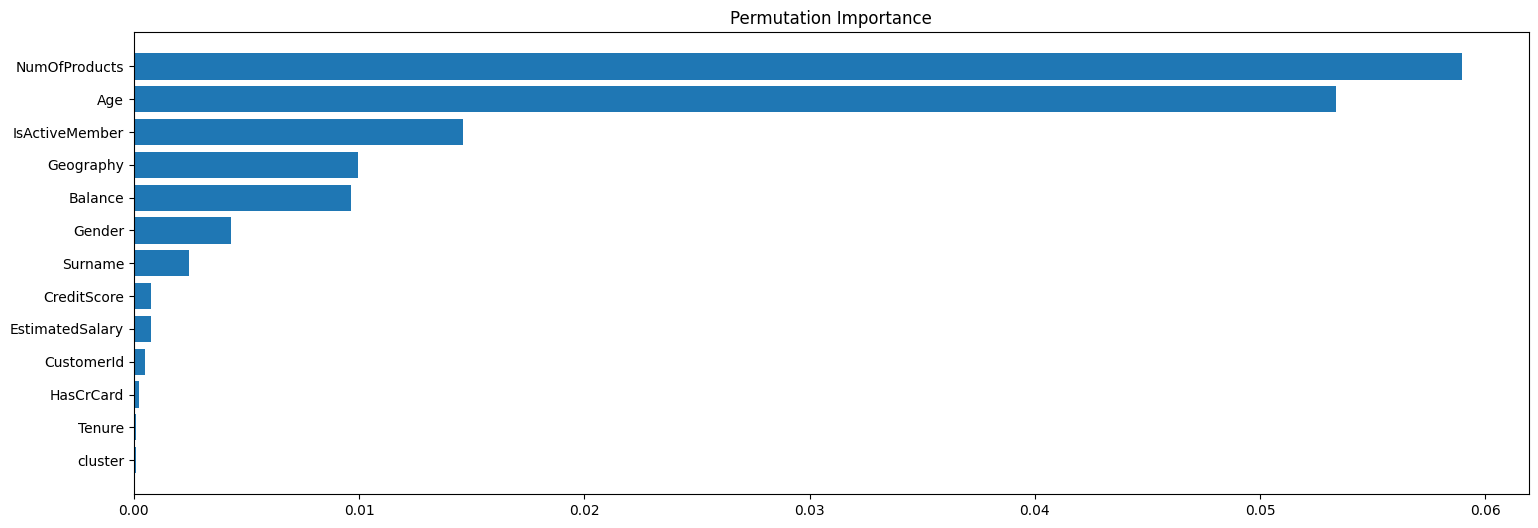

In [ ]:
# permutation importance
perm_importance = permutation_importance(catmodel, np.ascontiguousarray(X_test), y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')
plt.show()

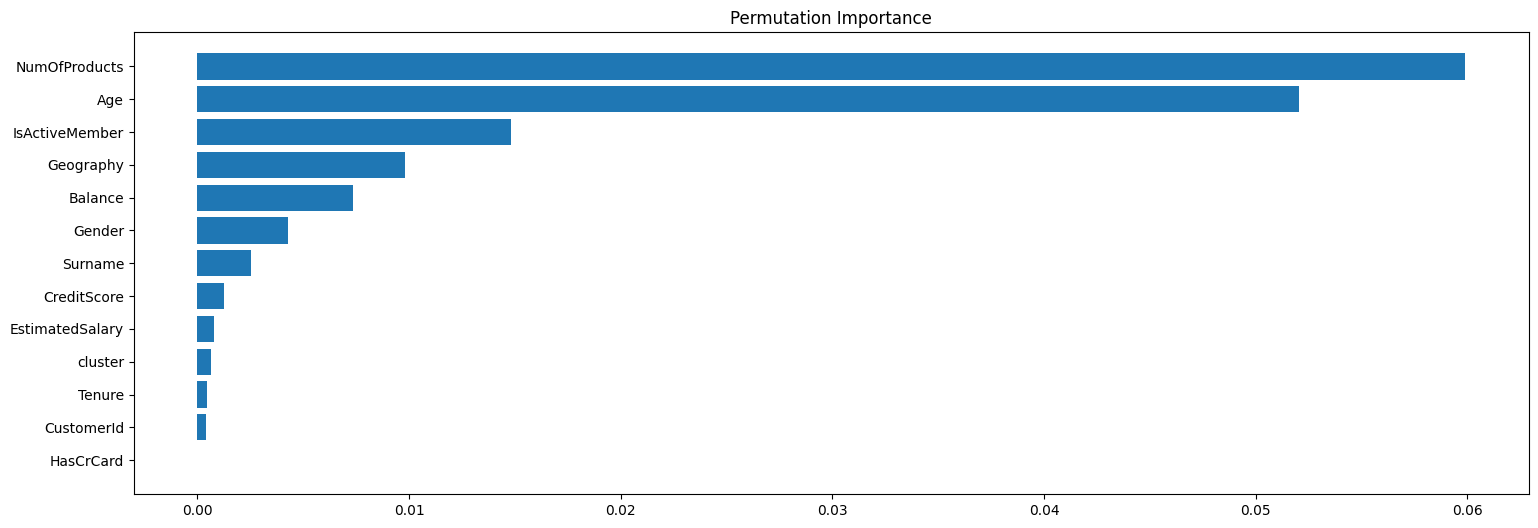

In [ ]:
# permutation importance
perm_importance = permutation_importance(xgbmodel, np.ascontiguousarray(X_test), y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')
plt.show()